<a href="https://colab.research.google.com/github/nehadubey1205/NLP-college/blob/main/Assignment2_NLP_NehaDubey1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-a

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [21]:
data= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/NLP Assignment/a2_text (2).csv',sep='\t')

In [3]:
data.head(2)



,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...


In [ ]:
data.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [ ]:
data.isnull().sum()

tweet_id     0
sentiment    0
author       0
content      0
dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [22]:
data["Length"]=data["content"].str.len()
data.head()
#data['length'] = data['content'].apply(lambda x: len(x))
#print(data)
#The pandas built-in methods are more robust than using 'apply'. For example, this method will raise a TypeError, 
#if NaN is present in the string column, but the built-in .str.len will handle NaN.'''
#https://stackoverflow.com/questions/42815768/pandas-adding-column-with-the-length-of-other-column-as-value

,tweet_id,sentiment,author,content,Length
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86


In [23]:
import re

In [24]:
def check_find_punctuations(text):
    
    # regular expression containing
    # all punctuation
    result = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', 
                        text)
      
    # form a string
    string = "".join(result)
      
    # list of strings return
    return list(string)
    
# creating new column name
# as a punctuation_used and 
# applying user defined function
# on each rows of Comments column
data['punctuation_used'] = data['content'].apply(
                         lambda x : check_find_punctuations(x)
                         )
  
data.head(3)

,tweet_id,sentiment,author,content,Length,punctuation_used
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []"
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]"


In [25]:
data['punct']=[len(i) for i in data['punctuation_used']]
data.head()

,tweet_id,sentiment,author,content,Length,punctuation_used,punct
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3


In [26]:
data["mentions"]=data["content"].str.count("@")
data.head()

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,0
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,1


In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from nltk.corpus import stopwords    
stop_words = set(stopwords.words('english'))

#data['stopword'] = data['content'].str.split().apply(lambda x: len(set(x) & stop_words))
data['Stopwords'] = data['content'].apply(lambda x: len(set(x.split()) & stop_words))
data.head(5)

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions,Stopwords
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1,6
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0,4
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,0,3
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,1,6


1-b

In [29]:
data['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


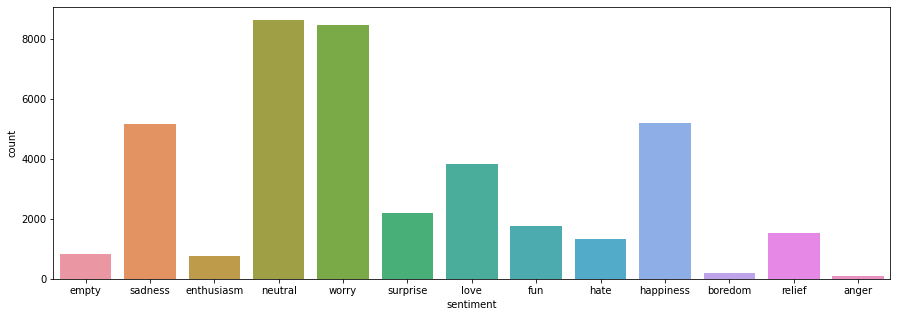

In [ ]:
#data['sentiment'].value_counts().plot(kind='bar')
# using seaborn
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(data['sentiment'])
plt.show()

In [72]:
data['comment'] = data['sentiment']
#data.head()
data['comment'].replace(['anger', 'boredome', 'empty', 'worry','hate','sadness','neutral','enthusiasm','fun','happiness','love','relief','surprise'],
                        [13,12,11,10,9,8,7,1,2,3,4,5,6], inplace=True)
# more than 7 denotes negative emotion and less than 7 denotes positive emotion, 7 = neutral

In [73]:
data.head(4)

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions,Stopwords,comment
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1,6,11
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0,4,8
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0,8
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,0,3,1


In [61]:
import pandas as pd


In [47]:
import seaborn as sns

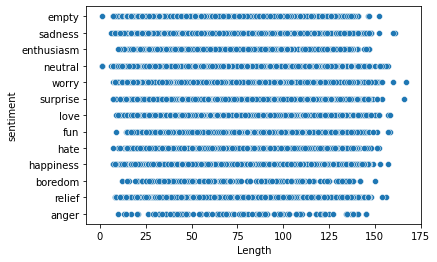

In [55]:
sns.scatterplot(x = data['Length'],y = data['sentiment'])

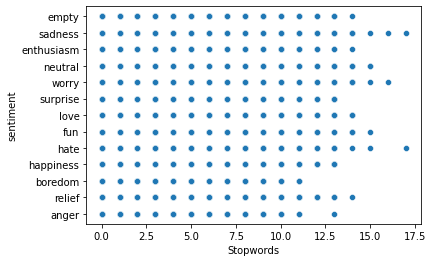

In [57]:
sns.scatterplot(x= data['Stopwords'],y= data['sentiment'])

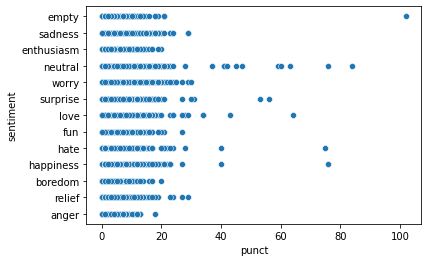

In [53]:
sns.scatterplot(x = data['punct'],y = data['sentiment'])

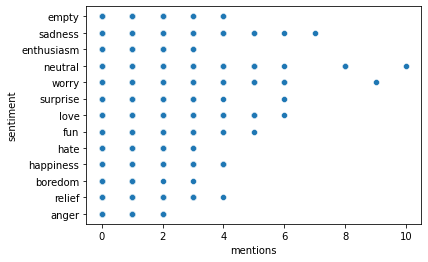

In [58]:
sns.scatterplot(x = data['mentions'],y = data['sentiment'])

In [44]:
list1 = data['Length']
list2 = data['comment']

 
# Apply the pearsonr()
#corr, _ = pearsonr(list1, list2)
#print('Pearsons correlation: %.3f' % corr)

,tweet_id,Length,punct,mentions,Stopwords
tweet_id,1.000000,0.020542,-0.040579,-0.099640,0.092375
Length,0.020542,1.000000,0.522437,0.139938,0.751296
punct,-0.040579,0.522437,1.000000,0.190619,0.178368
mentions,-0.099640,0.139938,0.190619,1.000000,0.023214
Stopwords,0.092375,0.751296,0.178368,0.023214,1.000000


In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='punct')

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data,  y='sentiment', x=data.index, hue='mentions')

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='Stopwords')

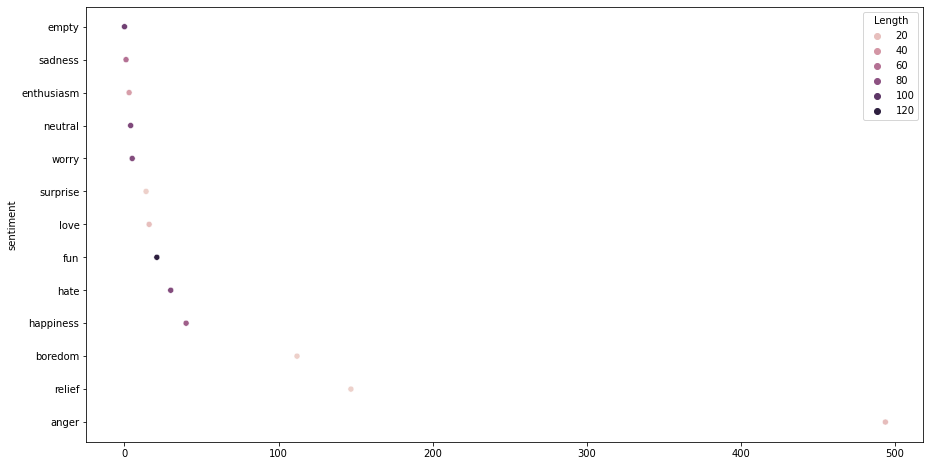

In [ ]:
#import seaborn as sns
#sns.scatterplot(data=data, x=data.index, y='sentiment', hue='Length')

In [ ]:
unique = set(data['sentiment'].str.replace('[^a-zA-Z ]', '').str.lower().str.split(' ').sum())
print(list(sorted(unique)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness', 'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']


1(c)

In [85]:
df = pd.DataFrame(data, columns = ["content"])
df.head()

,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


In [86]:
import pandas as pd
from nltk.corpus import stopwords

In [87]:
stop_words = stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [95]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    content = tweet.lower()
    # remove non letters
    content = re.sub(r"[^a-zA-Z0-9]", " ", content)
    # tokenize
    words = content.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

In [99]:
from tqdm import tqdm
#from nltk.stem.porter import *
from nltk.stem import PorterStemmer

In [100]:
cleantext=[]
for item in tqdm(data['content']):
    words=tweet_to_words(item)
    cleantext+=[words]
data['cleantext']=cleantext
data

100%|██████████| 40000/40000 [01:20<00:00, 497.72it/s]


,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions,Stopwords,comment,text,cleantext
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1,6,11,@tiffanylue know listenin bad habit earlier st...,"[tiffanylu, know, listenin, bad, habit, earlie..."
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0,4,8,layin n bed headache ughhhh...waitin call...,"[layin, n, bed, headach, ughhhh, waitin, call]"
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0,8,funeral ceremony...gloomy friday...,"[funer, ceremoni, gloomi, friday]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,0,3,1,wants hang friends soon!,"[want, hang, friend, soon]"
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,1,6,7,@dannycastillo want trade someone houston tick...,"[dannycastillo, want, trade, someon, houston, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor,16,[@],1,1,0,7,@johnlloydtaylor,[johnlloydtaylor]
39996,1753919001,love,drapeaux,Happy Mothers Day All my love,30,[],0,0,1,4,happy mothers day love,"[happi, mother, day, love]"
39997,1753919005,love,JenniRox,Happy Mother's Day to all the mommies out ther...,123,"[', ,, ', ', ', !]",6,0,12,4,"happy mother's day mommies there, woman man lo...","[happi, mother, day, mommi, woman, man, long, ..."
39998,1753919043,happiness,ipdaman1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,122,"[@, !, !, !, !, !, ., ., /, ., !, !]",12,1,0,3,@niariley wassup beautiful!!! follow me!! peep...,"[niariley, wassup, beauti, follow, peep, new, ..."


In [107]:
from collections import Counter
data['word_Count'] = data['cleantext'].str.len()
data.head(2)

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions,Stopwords,comment,text,cleantext,word_Count
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1,6,11,@tiffanylue know listenin bad habit earlier st...,"[tiffanylu, know, listenin, bad, habit, earlie...",9
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0,4,8,layin n bed headache ughhhh...waitin call...,"[layin, n, bed, headach, ughhhh, waitin, call]",7


In [ ]:
#tokenized_counts = Counter(tokens)
#df_tokenized = pd.DataFrame.from_dict(tokenized_counts, orient="cleantext").reset_index()

(-0.5, 399.5, 199.5, -0.5)

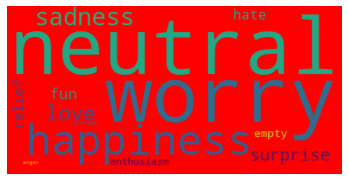

In [119]:
from wordcloud import WordCloud

text = " ".join(sentiment for sentiment in data.sentiment)
word_cloud = WordCloud(collocations = False, background_color = 'red').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

In [84]:
data.head(5)

,tweet_id,sentiment,author,content,Length,punctuation_used,punct,mentions,Stopwords,comment,text
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,"[@, =, []",3,1,6,11,@tiffanylue know listenin bad habit earlier st...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,"[., ., ., ., ., .]",6,0,4,8,layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,"[., ., ., ., ., .]",6,0,0,8,funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,36,[!],1,0,3,1,wants hang friends soon!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,"[@, ,, .]",3,1,6,7,@dannycastillo want trade someone houston tick...


**Question-2**
a

In [112]:
# when @ has been removed
D2 =df["content"].str.replace("@","")
D2.head()

0    tiffanylue i know  i was listenin to bad habit...
1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    dannycastillo We want to trade with someone wh...
Name: content, dtype: object

In [114]:
D3 = df
D3.head()

,content
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


2-b

In [ ]:
import io